# <center>Preventive Analysis of Car Accident Severity </center>

# Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#result)
* [Conclusion](#conclusion)

# Problem Statement <a name="introduction"></a>

In this project,we will try to develope a system for **purpose of preventing Accidents** and Other Traffic related disasters.Specifically,this report will target people who commute or travel more often in order to make commute safer for everyone.

Normally when we commute or travel for work or other activites,we are usually not aware of situation that one could encounter.One could face a disaster on his way or could face a severe accident.

  This would allow user to **plan journey in order to make travel more feasible and safe**.This would be dependent upon several different variables.e.g, weather,humidity and so on.
  
  We will use our dataset to study the relationship between various variable in accordance with accident severity.We will use various statistical tests such as **pearsonr,z test,t test** etc in order to study correlation between accident severity and Accident severity.



# Data <a name="data"></a>

 Based upon our problem statement the factors having an impact on our decision are,
 - Junction Type i.e Intersection,Highway etc
 - Weather will play a huge role
 - ROAD CONDITION indicates wether road is slippery or not.Bad Road Condition leads to greater risk of accident
 - LIGHT CONDITION implies the visibility.If visibility is hampered we wont be able to respond well to events. 
 
Above mentioned are some obvious factors invovled in accidents.In order to determine the relationship between other variables with respect to data we will perform multiple tests to calculate correlation. 

Following data sources will be needed to generate the required information.
- **Seatle SPD** Dataset that is open sourced.This Dataset is from 2004 till peresent.
- [Link to the Dataset](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches

In [2]:
!cd ..

In [3]:
!ls 

drive  sample_data


In [4]:
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data-Collisions.csv')


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Methodology <a name='methodology'></a>

In this project,we will direct our effort to check the factors that impact accident severity and try to form a hypothesis model in order to prevent such events from occurring in future.

In the first step,we will gather **Data provided by SPD Seatle**.we will analyze this Data via meta data provided by SPD and check for redundant things like registration number,accident ID Incident ID etc.Such things dont have any impact on outcome of our analysis.

In the second step,we will try to figure out what features impact severity of accident.We will use Z-test and one way ANOVA to calculate correlation and statistical significance of our outcome.Then we will plot data using bar plot to check where most accidents have occurred and what was severity of accident.

In the third step,we will try and explore various statistical methods to form a statistical relationship between independent variables(features) and dependent variables(target variable).We will try various classification techniques such as KNN,Decision Tree Classifier,SVM.

In [6]:
data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

 As shown from above description,some features contain way too many missing values.If we try to impute them we may end up messing up entire data minning process.So after dropping columns with too much missing values we can now start using Feature Engineering to find out which features are important.

# Analysis <a name='analysis'></a>

# Feature Engineering

- ST_COLCODEText : code provided by the state that describes the collision.
- ST_COLDESCText : description that corresponds to the state’s coding designation. 
- SDOTCOLNUM : A number given to the collision by SDOT.
- SDOT_COLDESC : A description of the collision corresponding to the collision code
- SDOT_COLCODE : A code given to the collision by SDOT.
- EXCEPTRSNCODE 
- EXCEPTRSNDESC 
- LOCATION : Description of the general location of the collision 
- SEVERITYDESC : detailed description of the severity of the collision.
- COLLISIONTYPE : Collision type 
- INJURIES : The number of total injuries in the collision. Thisis entered by the state. 
- SERIOUSINJURIES : The number of serious injuries in the collision. This is entered by the state.
- FATALITIES : The number of fatalities in the collision. This is entered by the state.

Features mentioned above are not of that much value to us.Since most of them are registration ID issued by states and remaining indicate aftermeth of accident which goes against our planned agenda which is to prevent any such incident from occurring.So they are not of that much usage in our case scenrio.

In [8]:
modified_data=data.drop(['ST_COLCODE','ST_COLDESC','SDOTCOLNUM','SDOT_COLDESC','SDOT_COLCODE','EXCEPTRSNCODE',
          'EXCEPTRSNDESC','LOCATION','COLLISIONTYPE'
          ,'INCKEY','COLDETKEY','OBJECTID','REPORTNO','INTKEY','HITPARKEDCAR','INCDTTM','SEVERITYDESC',
                        'SEGLANEKEY','CROSSWALKKEY','SEVERITYCODE.1'],axis=1)
modified_data.head()

,SEVERITYCODE,X,Y,STATUS,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING
0,2,-122.323148,47.703140,Matched,Intersection,2,0,0,2,2013/03/27 00:00:00+00,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,NaN
1,1,-122.347294,47.647172,Matched,Block,2,0,0,2,2006/12/20 00:00:00+00,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN
2,1,-122.334540,47.607871,Matched,Block,4,0,0,3,2004/11/18 00:00:00+00,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,NaN
3,1,-122.334803,47.604803,Matched,Block,3,0,0,3,2013/03/29 00:00:00+00,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,NaN
4,2,-122.306426,47.545739,Matched,Intersection,2,0,0,2,2004/01/28 00:00:00+00,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,NaN


# Data preprocessing

In [9]:
modified_data.ROADCOND.fillna(method='bfill',inplace=True)

In [10]:
modified_data.UNDERINFL=modified_data.UNDERINFL.map({'Y':1,'N':0})

In [11]:
modified_data.UNDERINFL.value_counts()

0.0    100274
1.0      5126
Name: UNDERINFL, dtype: int64

In [12]:
modified_data.STATUS=modified_data.STATUS.map({'Matched':1,'Unmatched':0})


In [13]:
modified_data.STATUS.dtype

dtype('int64')

In [14]:
modified_data.JUNCTIONTYPE.value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [15]:
modified_data.ROADCOND.value_counts()

Dry               127872
Wet                48806
Unknown            15331
Ice                 1234
Snow/Slush          1036
Other                134
Standing Water       119
Sand/Mud/Dirt         75
Oil                   66
Name: ROADCOND, dtype: int64

In [16]:
pd.get_dummies(modified_data.LIGHTCOND)

,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
194668,0,0,0,0,0,1,0,0,0
194669,0,0,0,0,0,1,0,0,0
194670,0,0,0,0,0,1,0,0,0
194671,0,0,0,0,0,0,1,0,0


In [17]:
modified_data.shape

(194673, 18)

In [18]:
modified_data=pd.concat([modified_data,pd.get_dummies(modified_data['WEATHER'])],axis=1)
modified_data.drop(['WEATHER','Unknown'],inplace=True,axis=1)
modified_data.Clear.dtype

dtype('uint8')

In [19]:
modified_data=pd.concat([modified_data,pd.get_dummies(modified_data['ADDRTYPE'])],axis=1)
modified_data.drop('ADDRTYPE',axis=1,inplace=True)
modified_data.Alley.dtype

dtype('uint8')

In [20]:
modified_data=pd.concat([modified_data,pd.get_dummies(modified_data['JUNCTIONTYPE'])],axis=1)
modified_data.drop('JUNCTIONTYPE',axis=1,inplace=True)

In [21]:
modified_data=pd.concat([modified_data,pd.get_dummies(modified_data['ROADCOND'])],axis=1)
modified_data.drop('ROADCOND',axis=1,inplace=True)


In [22]:
modified_data=pd.concat([modified_data,pd.get_dummies(modified_data['LIGHTCOND'])],axis=1)
modified_data.drop(['LIGHTCOND','Unknown'],axis=1,inplace=True)
modified_data.Daylight.dtype

dtype('uint8')

In [23]:
modified_data.head()

,SEVERITYCODE,X,Y,STATUS,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Alley,Block,Intersection,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other
0,2,-122.323148,47.703140,1,2,0,0,2,2013/03/27 00:00:00+00,NaN,0.0,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,-122.347294,47.647172,1,2,0,0,2,2006/12/20 00:00:00+00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,1,-122.334540,47.607871,1,4,0,0,3,2004/11/18 00:00:00+00,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,-122.334803,47.604803,1,3,0,0,3,2013/03/29 00:00:00+00,NaN,0.0,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2,-122.306426,47.545739,1,2,0,0,2,2004/01/28 00:00:00+00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [24]:
modified_data.columns

Index(['SEVERITYCODE', 'X', 'Y', 'STATUS', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'INATTENTIONIND', 'UNDERINFL',
       'PEDROWNOTGRNT', 'SPEEDING', 'Blowing Sand/Dirt', 'Clear',
       'Fog/Smog/Smoke', 'Other', 'Overcast', 'Partly Cloudy', 'Raining',
       'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing', 'Alley',
       'Block', 'Intersection',
       'At Intersection (but not related to intersection)',
       'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'Mid-Block (not related to intersection)', 'Ramp Junction', 'Dry',
       'Ice', 'Oil', 'Other', 'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water',
       'Wet', 'Dark - No Street Lights', 'Dark - Street Lights Off',
       'Dark - Street Lights On', 'Dark - Unknown Lighting', 'Dawn',
       'Daylight', 'Dusk', 'Other'],
      dtype='object')

In [25]:
modified_data.drop('Other',inplace=True,axis=1)
modified_data.columns

Index(['SEVERITYCODE', 'X', 'Y', 'STATUS', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'INATTENTIONIND', 'UNDERINFL',
       'PEDROWNOTGRNT', 'SPEEDING', 'Blowing Sand/Dirt', 'Clear',
       'Fog/Smog/Smoke', 'Overcast', 'Partly Cloudy', 'Raining',
       'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing', 'Alley',
       'Block', 'Intersection',
       'At Intersection (but not related to intersection)',
       'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'Mid-Block (not related to intersection)', 'Ramp Junction', 'Dry',
       'Ice', 'Oil', 'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water', 'Wet',
       'Dark - No Street Lights', 'Dark - Street Lights Off',
       'Dark - Street Lights On', 'Dark - Unknown Lighting', 'Dawn',
       'Daylight', 'Dusk'],
      dtype='object')

In [26]:
modified_data.isnull().sum()

SEVERITYCODE                                              0
X                                                      5334
Y                                                      5334
STATUS                                                    0
PERSONCOUNT                                               0
PEDCOUNT                                                  0
PEDCYLCOUNT                                               0
VEHCOUNT                                                  0
INCDATE                                                   0
INATTENTIONIND                                       164868
UNDERINFL                                             89273
PEDROWNOTGRNT                                        190006
SPEEDING                                             185340
Blowing Sand/Dirt                                         0
Clear                                                     0
Fog/Smog/Smoke                                            0
Overcast                                

## Exploratory Data Analysis

# Checking for imbalance

In [27]:
modified_data.SEVERITYCODE.value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

### Correlation

In [28]:
modified_data.corr()

,SEVERITYCODE,X,Y,STATUS,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Alley,Block,Intersection,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
SEVERITYCODE,1.000000,0.010309,0.017737,0.030967,0.130949,0.246338,0.214218,-0.054686,0.032583,-0.001150,0.059436,0.003518,0.014813,0.003333,0.037883,-0.000468,-0.002691,-0.016495,-0.025790,-0.184745,0.199089,-0.000445,0.201628,0.002190,0.016929,-0.167415,0.001685,0.059961,-0.012986,0.002604,0.000333,-0.021078,-0.002528,0.037873,-0.015901,-0.006079,-0.000618,0.001063,0.007586,0.087616,0.011773
X,0.010309,1.000000,-0.160262,0.002805,0.012887,0.011304,-0.001752,-0.012168,-0.032115,-0.000586,0.004868,-0.001060,0.002897,0.003220,0.003942,0.000196,-0.001591,0.000375,NaN,-0.005886,0.005886,0.006526,0.004604,0.006542,0.020572,-0.019018,-0.005247,-0.001020,0.008280,0.001230,0.002846,0.001587,-0.002861,0.009714,-0.000144,0.005227,-0.022242,-0.000363,-0.000105,0.026140,0.004838
Y,0.017737,-0.160262,1.000000,-0.001490,-0.013850,0.010178,0.026304,0.017058,-0.004495,0.000903,-0.011992,-0.006597,0.003921,-0.004680,-0.011178,0.002099,0.000380,-0.000311,NaN,-0.034444,0.034444,0.002460,0.034263,0.022620,-0.001753,-0.043478,-0.002992,-0.008237,-0.010751,-0.003442,0.001129,0.000732,-0.002000,-0.009141,-0.009996,-0.009903,-0.007063,-0.001136,-0.015967,-0.004345,0.008206
STATUS,0.030967,0.002805,-0.001490,1.000000,0.067552,0.030077,0.027214,0.488122,NaN,0.002722,0.185019,0.008688,0.065284,0.000813,0.072603,0.001819,0.003867,0.010979,0.007867,-0.005287,0.008526,0.004664,0.007077,0.019458,0.017374,-0.028106,0.000188,-0.004423,0.002473,-0.000612,0.003150,-0.002253,-0.001345,-0.005818,0.014315,0.012632,0.092366,0.001206,0.018310,0.195003,0.028374
PERSONCOUNT,0.130949,0.012887,-0.013850,0.067552,1.000000,-0.023464,-0.038809,0.380523,0.020626,-0.002450,0.047065,-0.005930,0.011011,0.000586,0.022984,-0.002058,-0.000193,-0.004321,-0.025228,-0.056826,0.067153,0.000281,0.068239,0.003446,0.044499,-0.071390,0.000160,0.038773,-0.014111,-0.005044,-0.006677,-0.002960,-0.008630,0.016460,-0.015269,-0.005750,0.017093,-0.003498,-0.019821,0.054236,0.010907
PEDCOUNT,0.246338,0.011304,0.010178,0.030077,-0.023464,1.000000,-0.016920,-0.261285,0.009125,-0.001651,0.004113,0.001377,0.001315,-0.000950,0.032832,-0.002124,0.001941,-0.004068,0.003809,-0.140409,0.144936,-0.015295,0.149797,-0.012336,-0.052848,-0.089452,-0.002811,-0.000386,-0.006804,-0.003452,-0.001038,-0.004089,-0.002538,0.025443,0.002612,0.002144,0.030356,0.005489,0.010835,-0.001915,0.005413
PEDCYLCOUNT,0.214218,-0.001752,0.026304,0.027214,-0.038809,-0.016920,1.000000,-0.253773,-0.019379,-0.001067,0.051439,-0.006340,0.001771,-0.000859,-0.027840,-0.001922,-0.002813,-0.010702,-0.006594,-0.080428,0.085377,-0.007597,0.087869,0.036267,-0.037892,-0.064170,-0.002852,0.052516,-0.009292,-0.003123,-0.000202,-0.010718,-0.000470,-0.031621,-0.003688,-0.001977,-0.031864,0.002807,0.010615,0.051020,0.007773
VEHCOUNT,-0.054686,-0.012168,0.017058,0.488122,0.380523,-0.261285,-0.253773,1.000000,-0.008729,0.002610,0.102743,-0.001949,0.029365,0.000636,0.021132,-0.003606,-0.000692,0.006079,-0.024622,0.078133,-0.073548,0.012078,-0.076654,0.002373,0.042699,0.044905,-0.000237,0.014386,-0.012641,-0.007416,-0.008735,-0.003572,-0.013362,-0.018041,-0.004069,-0.000210,0.014354,-0.005554,-0.005116,0.126593,0.012940
UNDERINFL,0.032583,-0.032115,-0.004495,NaN,0.020626,0.009125,-0.019379,-0.008729,1.000000,-0.001091,0.015841,0.008934,0.007380,-0.001557,0.015955,0.001000,-0.000199,0.000094,0.000630,0.045064,-0.042866,0.006329,-0.044894,-0.024514,0.004081,0.062301,-0.0

### ANOVA

#### Correlation of ADDRTYPE

In [29]:
grouped_test2=data[['ADDRTYPE', 'SEVERITYCODE']].groupby(['ADDRTYPE'])
grouped_test2.head(2)

,ADDRTYPE,SEVERITYCODE
0,Intersection,2
1,Block,1
2,Block,1
4,Intersection,2
10,Alley,1
74,NaN,1
171,NaN,1
261,Alley,1


In [30]:
f_val,p_val=stats.f_oneway(grouped_test2.get_group('Intersection')['SEVERITYCODE'],
                           grouped_test2.get_group('Block')['SEVERITYCODE'],
                          grouped_test2.get_group('Alley')['SEVERITYCODE'])
f_val,p_val

(3926.571108053494, 0.0)

In [31]:
f_val,p_val=stats.f_oneway(grouped_test2.get_group('Intersection')['SEVERITYCODE'],
                           grouped_test2.get_group('Block')['SEVERITYCODE'])
f_val,p_val

(7700.467877257835, 0.0)

In [32]:
f_val,p_val=stats.f_oneway(grouped_test2.get_group('Intersection')['SEVERITYCODE'],
                           grouped_test2.get_group('Alley')['SEVERITYCODE'])
f_val,p_val

(309.52392660200826, 3.9948066138361647e-69)

In [33]:
f_val,p_val=stats.f_oneway(grouped_test2.get_group('Alley')['SEVERITYCODE'],
                           grouped_test2.get_group('Block')['SEVERITYCODE'])
f_val,p_val

(67.72657266059718, 1.8955899047496788e-16)

 ##  Relation between ADDRTYPE and Severity of Accident

In [34]:
combined=data.groupby(['ADDRTYPE','SEVERITYCODE']).size().to_frame()
combined.columns=['NUMBER_OF_INCIDENTS']
combined.reset_index(inplace=True)

<Figure size 576x360 with 0 Axes>

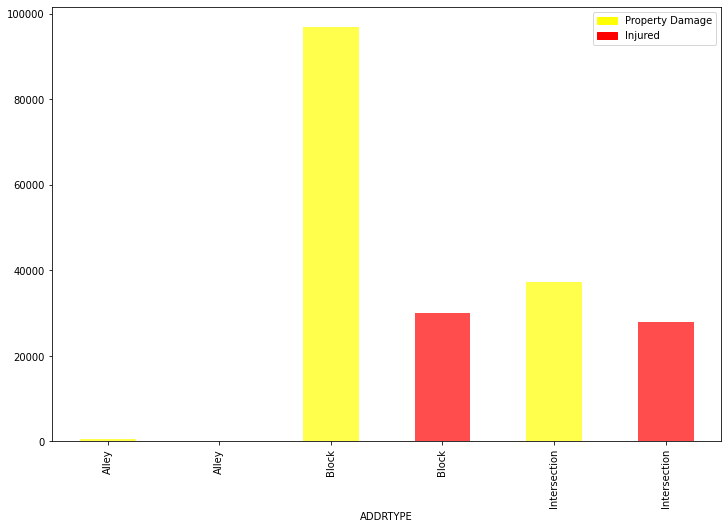

In [35]:
plt.figure(figsize=(8,5))

combined.plot(kind='bar',
             x='ADDRTYPE',
             y='NUMBER_OF_INCIDENTS',
             figsize=(12,8),
             color=['Yellow','Red'],
             alpha=0.7)

red_patch = mpatches.Patch(color='Yellow', label='Property Damage')
yellow_patch = mpatches.Patch(color='Red', label='Injured')

plt.legend(handles=[red_patch,yellow_patch])

## Relation b/w Weather and Severity of Accident

In [36]:
group2=data.groupby(['WEATHER','SEVERITYCODE']).size().to_frame()
group2.columns=['Number of Incidents']
group2.reset_index(inplace=True)
group2

,WEATHER,SEVERITYCODE,Number of Incidents
0,Blowing Sand/Dirt,1,41
1,Blowing Sand/Dirt,2,15
2,Clear,1,75295
3,Clear,2,35840
4,Fog/Smog/Smoke,1,382
5,Fog/Smog/Smoke,2,187
6,Other,1,716
7,Other,2,116
8,Overcast,1,18969
9,Overcast,2,8745


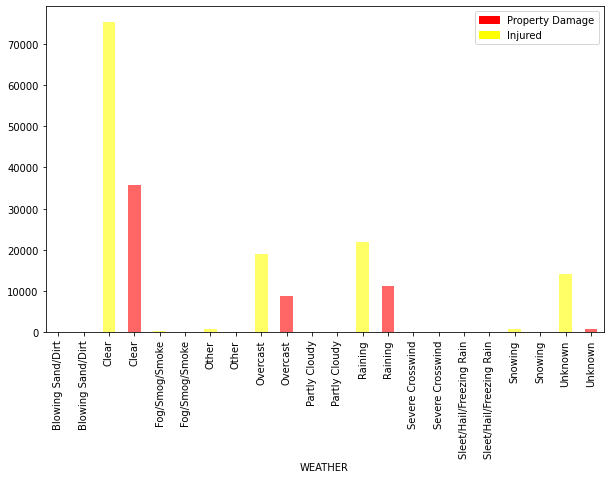

In [37]:
group2.plot(kind='bar',
           x='WEATHER',
           y='Number of Incidents',
           figsize=(10,6),
           color=['Yellow','Red'],
           alpha=0.6)
red_patch = mpatches.Patch(color='Red', label='Property Damage')
yellow_patch = mpatches.Patch(color='Yellow', label='Injured')

plt.legend(handles=[red_patch,yellow_patch])

## Relation between weather and Road Condition

In [38]:
group3=data.groupby(['ROADCOND','SEVERITYCODE']).size().to_frame()
group3.columns=['Number of Incidents']
group3.reset_index(inplace=True)
group3

,ROADCOND,SEVERITYCODE,Number of Incidents
0,Dry,1,84446
1,Dry,2,40064
2,Ice,1,936
3,Ice,2,273
4,Oil,1,40
5,Oil,2,24
6,Other,1,89
7,Other,2,43
8,Sand/Mud/Dirt,1,52
9,Sand/Mud/Dirt,2,23


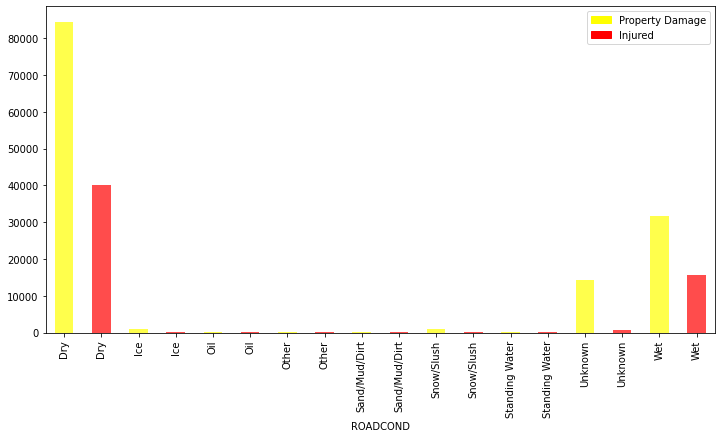

In [39]:
group3.plot(kind='bar',
           x='ROADCOND',
           y='Number of Incidents',
           figsize=(12,6),
           color=['Yellow','Red'],
           alpha=0.7)
red_patch=mpatches.Patch(color='Yellow',label='Property Damage')
yellow_patch=mpatches.Patch(color='Red',label='Injured')
plt.legend(handles=[red_patch,yellow_patch])

In [40]:
group3=data.groupby(['LIGHTCOND','SEVERITYCODE']).size().to_frame()
group3.columns=['Number of Incidents']
group3.reset_index(inplace=True)
group3

,LIGHTCOND,SEVERITYCODE,Number of Incidents
0,Dark - No Street Lights,1,1203
1,Dark - No Street Lights,2,334
2,Dark - Street Lights Off,1,883
3,Dark - Street Lights Off,2,316
4,Dark - Street Lights On,1,34032
5,Dark - Street Lights On,2,14475
6,Dark - Unknown Lighting,1,7
7,Dark - Unknown Lighting,2,4
8,Dawn,1,1678
9,Dawn,2,824


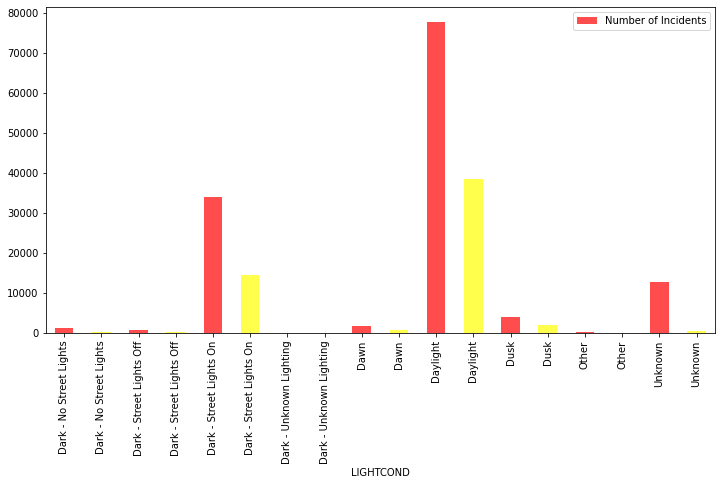

In [41]:
group3.plot(kind='bar',
           x='LIGHTCOND',
           y='Number of Incidents',
           figsize=(12,6),
           color=['Red','Yellow'],
           alpha=0.7)

## One hot encoding
Now we will transform our categorical variables to numerical values in order to be able to apply various statistics technique and eventually perform machine learning technique to get insight of data.

In [42]:
modified_data.SPEEDING=modified_data.SPEEDING.map({'Y':1,'N':0})
modified_data.head()

,SEVERITYCODE,X,Y,STATUS,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Alley,Block,Intersection,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,2,-122.323148,47.703140,1,2,0,0,2,2013/03/27 00:00:00+00,NaN,0.0,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,-122.347294,47.647172,1,2,0,0,2,2006/12/20 00:00:00+00,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,1,-122.334540,47.607871,1,4,0,0,3,2004/11/18 00:00:00+00,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,-122.334803,47.604803,1,3,0,0,3,2013/03/29 00:00:00+00,NaN,0.0,NaN,NaN,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,-122.306426,47.545739,1,2,0,0,2,2004/01/28 00:00:00+00,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [43]:
modified_data.UNDERINFL=modified_data.UNDERINFL.map({'Y':1,'N':0})
modified_data.UNDERINFL.replace(np.nan,0,inplace=True)
modified_data.head()

,SEVERITYCODE,X,Y,STATUS,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Alley,Block,Intersection,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,2,-122.323148,47.703140,1,2,0,0,2,2013/03/27 00:00:00+00,NaN,0.0,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,-122.347294,47.647172,1,2,0,0,2,2006/12/20 00:00:00+00,NaN,0.0,NaN,NaN,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,1,-122.334540,47.607871,1,4,0,0,3,2004/11/18 00:00:00+00,NaN,0.0,NaN,NaN,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,-122.334803,47.604803,1,3,0,0,3,2013/03/29 00:00:00+00,NaN,0.0,NaN,NaN,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,-122.306426,47.545739,1,2,0,0,2,2004/01/28 00:00:00+00,NaN,0.0,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [44]:
modified_data.shape

(194673, 45)

In [45]:
modified_data.UNDERINFL=modified_data.UNDERINFL.map({'Y':1,'N':0})
modified_data.UNDERINFL.replace(np.nan,0,inplace=True)
modified_data.head()

,SEVERITYCODE,X,Y,STATUS,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Alley,Block,Intersection,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,2,-122.323148,47.703140,1,2,0,0,2,2013/03/27 00:00:00+00,NaN,0.0,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,-122.347294,47.647172,1,2,0,0,2,2006/12/20 00:00:00+00,NaN,0.0,NaN,NaN,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,1,-122.334540,47.607871,1,4,0,0,3,2004/11/18 00:00:00+00,NaN,0.0,NaN,NaN,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,-122.334803,47.604803,1,3,0,0,3,2013/03/29 00:00:00+00,NaN,0.0,NaN,NaN,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,-122.306426,47.545739,1,2,0,0,2,2004/01/28 00:00:00+00,NaN,0.0,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


## Dealing with missing values

In [46]:
modified_data.isnull().sum()

SEVERITYCODE                                              0
X                                                      5334
Y                                                      5334
STATUS                                                    0
PERSONCOUNT                                               0
PEDCOUNT                                                  0
PEDCYLCOUNT                                               0
VEHCOUNT                                                  0
INCDATE                                                   0
INATTENTIONIND                                       164868
UNDERINFL                                                 0
PEDROWNOTGRNT                                        190006
SPEEDING                                             185340
Blowing Sand/Dirt                                         0
Clear                                                     0
Fog/Smog/Smoke                                            0
Overcast                                

Statistical guidance articles have stated that bias is likely in analyses with more than 10% missingness and that if more than 40% data are missing in important variables then results should only be considered as hypothesis generating.As a rule of thumb, when the data goes missing on 60–70 percent of the variable, dropping the variable should be considered.

In [47]:
data.PEDROWNOTGRNT.value_counts()

Y    4667
Name: PEDROWNOTGRNT, dtype: int64

In [48]:
modified_data.drop(['INATTENTIONIND','SPEEDING','PEDROWNOTGRNT'],axis=1,inplace=True)


In [49]:
modified_data.drop(['X','Y'],axis=1,inplace=True)
modified_data.isnull().sum()

SEVERITYCODE                                         0
STATUS                                               0
PERSONCOUNT                                          0
PEDCOUNT                                             0
PEDCYLCOUNT                                          0
VEHCOUNT                                             0
INCDATE                                              0
UNDERINFL                                            0
Blowing Sand/Dirt                                    0
Clear                                                0
Fog/Smog/Smoke                                       0
Overcast                                             0
Partly Cloudy                                        0
Raining                                              0
Severe Crosswind                                     0
Sleet/Hail/Freezing Rain                             0
Snowing                                              0
Alley                                                0
Block     

In [50]:
modified_data.head()

,SEVERITYCODE,STATUS,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,UNDERINFL,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Alley,Block,Intersection,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,2,1,2,0,0,2,2013/03/27 00:00:00+00,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,1,2,0,0,2,2006/12/20 00:00:00+00,0.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,1,1,4,0,0,3,2004/11/18 00:00:00+00,0.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,1,3,0,0,3,2013/03/29 00:00:00+00,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,1,2,0,0,2,2004/01/28 00:00:00+00,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [51]:
modified_data.INCDATE=modified_data.INCDATE.map(lambda x:x[:10])
modified_data.INCDATE=pd.to_datetime(modified_data.INCDATE,format='%Y/%m/%d')
modified_data.INCDATE.dtype

dtype('<M8[ns]')

In [52]:
modified_data['DATE']=modified_data.INCDATE.dt.day
modified_data['MONTH']=modified_data.INCDATE.dt.month
modified_data.drop('INCDATE',axis=1,inplace=True)
modified_data.head()

,SEVERITYCODE,STATUS,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Alley,Block,Intersection,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,DATE,MONTH
0,2,1,2,0,0,2,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,27,3
1,1,1,2,0,0,2,0.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,20,12
2,1,1,4,0,0,3,0.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,18,11
3,1,1,3,0,0,3,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,29,3
4,2,1,2,0,0,2,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,28,1


In [53]:
modified_data.shape

(194673, 41)

In [55]:
import xgboost as xgb
from sklearn import model_selection,ensemble
from sklearn import svm,tree,neighbors
from sklearn import metrics,preprocessing

In [56]:
target='SEVERITYCODE'

## Balancing and Splitting data

In [57]:
min_class_len=len(modified_data[modified_data[target]==2])
maj_class_indices=modified_data[modified_data[target]==1].index
random_majority_indices=np.random.choice(maj_class_indices,
                                        min_class_len+1000,
                                        replace=False)
min_class_indices=modified_data[modified_data[target]==2].index
under_sampled=np.concatenate([min_class_indices,random_majority_indices])
undersampled_data=modified_data.loc[under_sampled]
undersampled_data.head()

,SEVERITYCODE,STATUS,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Alley,Block,Intersection,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,DATE,MONTH
0,2,1,2,0,0,2,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,27,3
4,2,1,2,0,0,2,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,28,1
7,2,1,3,0,1,1,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,15,4
9,2,1,2,0,0,2,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,20,3
14,2,1,2,0,0,2,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,31,3


In [58]:
X=undersampled_data.loc[:,undersampled_data.columns!=target]
y=undersampled_data.loc[:,undersampled_data.columns==target]

In [59]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.3,random_state=1)

In [60]:
X_train.DATE=(X_train.DATE)/X_train.DATE.std()
X_test.DATE=(X_test.DATE)/X_test.DATE.std()
X_train.MONTH=(X_train.DATE)/X_train.MONTH.std()
X_test.MONTH=(X_test.DATE)/X_test.MONTH.std()
#X_train.MONTH=preprocessing.StandardScaler().fit_transform(X_train.MONTH)
#X_test.DATE=preprocessing.StandardScaler().fit_transform(X_test.DATE)
#X_test.MONTH=preprocessing.StandardScaler().fit_transform(X_test.MONTH)
X_test.DATE.dtype

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


dtype('float64')

# Machine Learning

In [61]:
dt=tree.DecisionTreeClassifier(criterion='gini',min_samples_leaf=2,
                               min_samples_split=4,max_depth=10
                              )
dt.fit(X_train[:40000],y_train[:40000])


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [62]:
yhat=dt.predict(X_train[:40000])
metrics.accuracy_score(y_train[:40000],yhat)

0.681

In [63]:
yhat=dt.predict(X_test)
metrics.accuracy_score(y_test,yhat)

0.6640445290091728

In [64]:
print(metrics.classification_report(y_test,yhat))

              precision    recall  f1-score   support

           1       0.67      0.66      0.66     17654
           2       0.66      0.66      0.66     17559

    accuracy                           0.66     35213
   macro avg       0.66      0.66      0.66     35213
weighted avg       0.66      0.66      0.66     35213



In [65]:
SVM=svm.SVC()
SVM.fit(X_train[:40000],y_train[:40000])


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [66]:
yhat=SVM.predict(X_train[:40000])
metrics.accuracy_score(y_train[:40000],yhat)

0.67115

In [67]:
yhat=SVM.predict(X_test)
metrics.accuracy_score(y_test,yhat)

0.6643853122426376

In [68]:
print(metrics.classification_report(y_test,yhat))

              precision    recall  f1-score   support

           1       0.67      0.66      0.66     17654
           2       0.66      0.67      0.66     17559

    accuracy                           0.66     35213
   macro avg       0.66      0.66      0.66     35213
weighted avg       0.66      0.66      0.66     35213



In [69]:
model=ensemble.RandomForestClassifier(min_samples_leaf=1,
                               min_samples_split=2,max_depth=15)
model.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
yhat=model.predict(X_train[:10000])
metrics.accuracy_score(y_train[:10000],yhat)

0.7007

In [71]:
yhat=model.predict(X_test)
metrics.accuracy_score(y_test,yhat)

0.6664868088490046

In [72]:
print(metrics.classification_report(y_test,yhat))

              precision    recall  f1-score   support

           1       0.67      0.65      0.66     17654
           2       0.66      0.68      0.67     17559

    accuracy                           0.67     35213
   macro avg       0.67      0.67      0.67     35213
weighted avg       0.67      0.67      0.67     35213



In [73]:
model=ensemble.AdaBoostClassifier()
model.fit(X_train,y_train)
yhat=model.predict(X_test)
metrics.accuracy_score(y_test,yhat)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6541050180331127

In [75]:
print(metrics.classification_report(y_test,yhat))

              precision    recall  f1-score   support

           1       0.63      0.77      0.69     17654
           2       0.70      0.54      0.61     17559

    accuracy                           0.65     35213
   macro avg       0.66      0.65      0.65     35213
weighted avg       0.66      0.65      0.65     35213



In [76]:
model=xgb.XGBClassifier()
model.fit(X_train,y_train)
yhat=model.predict(X_test)
metrics.accuracy_score(y_test,yhat)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6685599068525828

In [78]:
print(metrics.classification_report(y_test,yhat))

              precision    recall  f1-score   support

           1       0.67      0.68      0.67     17654
           2       0.67      0.66      0.66     17559

    accuracy                           0.67     35213
   macro avg       0.67      0.67      0.67     35213
weighted avg       0.67      0.67      0.67     35213



# Result and discussion <a name = "result"></a>

Although,all the models gave similar results and were interpretable but there were certain differences.So In the end,we decided to use XGBoost model as it provided best accuracy,f1 score,precision and recall.All in all it was the all in one package we had.
After performing complex statistical techniques,we had to analyze which factor impact road accident more then other.This is major objective of this course as mentioned in the introduction.
Outcome was that greater number of persons,vehicles,pedestrians involved,greater the severity of accident and vice versa.
This was expected from beginning but thing that was surprising is that on some day accidents occur more then the other.On these dates there is usually either start of work week or end of work week.Mainly either Monday or Friday.
Precautions can help us avoid these situations from occurring in the first place.More caution needs to be advised on normal days as travelers become careless when situation is normal and this leads to a disaster.
Further more we need to lower the number of vehicles of street to prevent other traffic related issues.
On alley,there needs to be more strict speed control laws and drivers should be penalized more,

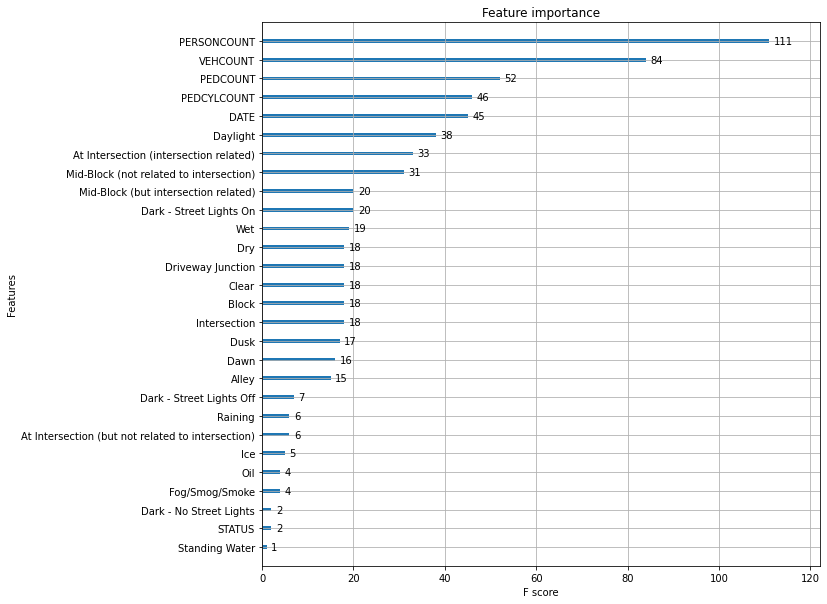

In [88]:
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [8, 8]
plt.show()


# Conclusion <a name = 'conclusion'></a>

Although we got 67% accuracy using classification models using XG Boost,however it can be further improvised.Many important features had to be dropped to due the fact that they has 75-90% missing data.Had we tried to fill them up using something we might have biased our dataset and eventually we would have had biased our dataset.If Dataset had all the variables in place then it would have been much more accurate.